<a href="https://colab.research.google.com/github/luiscsuarez/BigDataLuisS/blob/main/fraud_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final de analisis de fraude**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_fraud.csv to data_fraud.csv
User uploaded file "data_fraud.csv" with length 866798 bytes


In [3]:
!ls

data_fraud.csv	sample_data


In [4]:
!pwd

/content


In [5]:
data = pd.read_csv('/content/data_fraud.csv')

In [6]:
data.shape

(9994, 7)

In [7]:
data.head()

,Amount,sign_in_count,cantidad_tx,registro_agrega_tc,agrega_verifica_tc,verifica_compra_tc,Class
0,75.99,1620,103,14376.771075,0.006518,0.001361,0
1,5.00,80,2,0.143090,0.017909,0.001715,1
2,5.00,80,2,0.143090,0.017909,0.001715,1
3,393.80,20,1,0.261614,0.000698,0.001950,1
4,224.20,20,1,2.939503,0.027073,0.002014,1


In [8]:
# Print the shape of the data
#data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(9994, 7)
            Amount  sign_in_count  ...  verifica_compra_tc        Class
count  9994.000000    9994.000000  ...         9994.000000  9994.000000
mean    228.726280    1579.279468  ...         3840.625022     0.377727
std     379.686323    2233.471231  ...         4824.327386     0.484843
min       0.800000       7.000000  ...            0.001361     0.000000
25%      43.117000     145.000000  ...            1.924311     0.000000
50%     109.800000     822.000000  ...         1222.962626     0.000000
75%     302.199500    1981.000000  ...         7099.703905     1.000000
max    8000.000000   14172.000000  ...        19440.597497     1.000000

[8 rows x 7 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

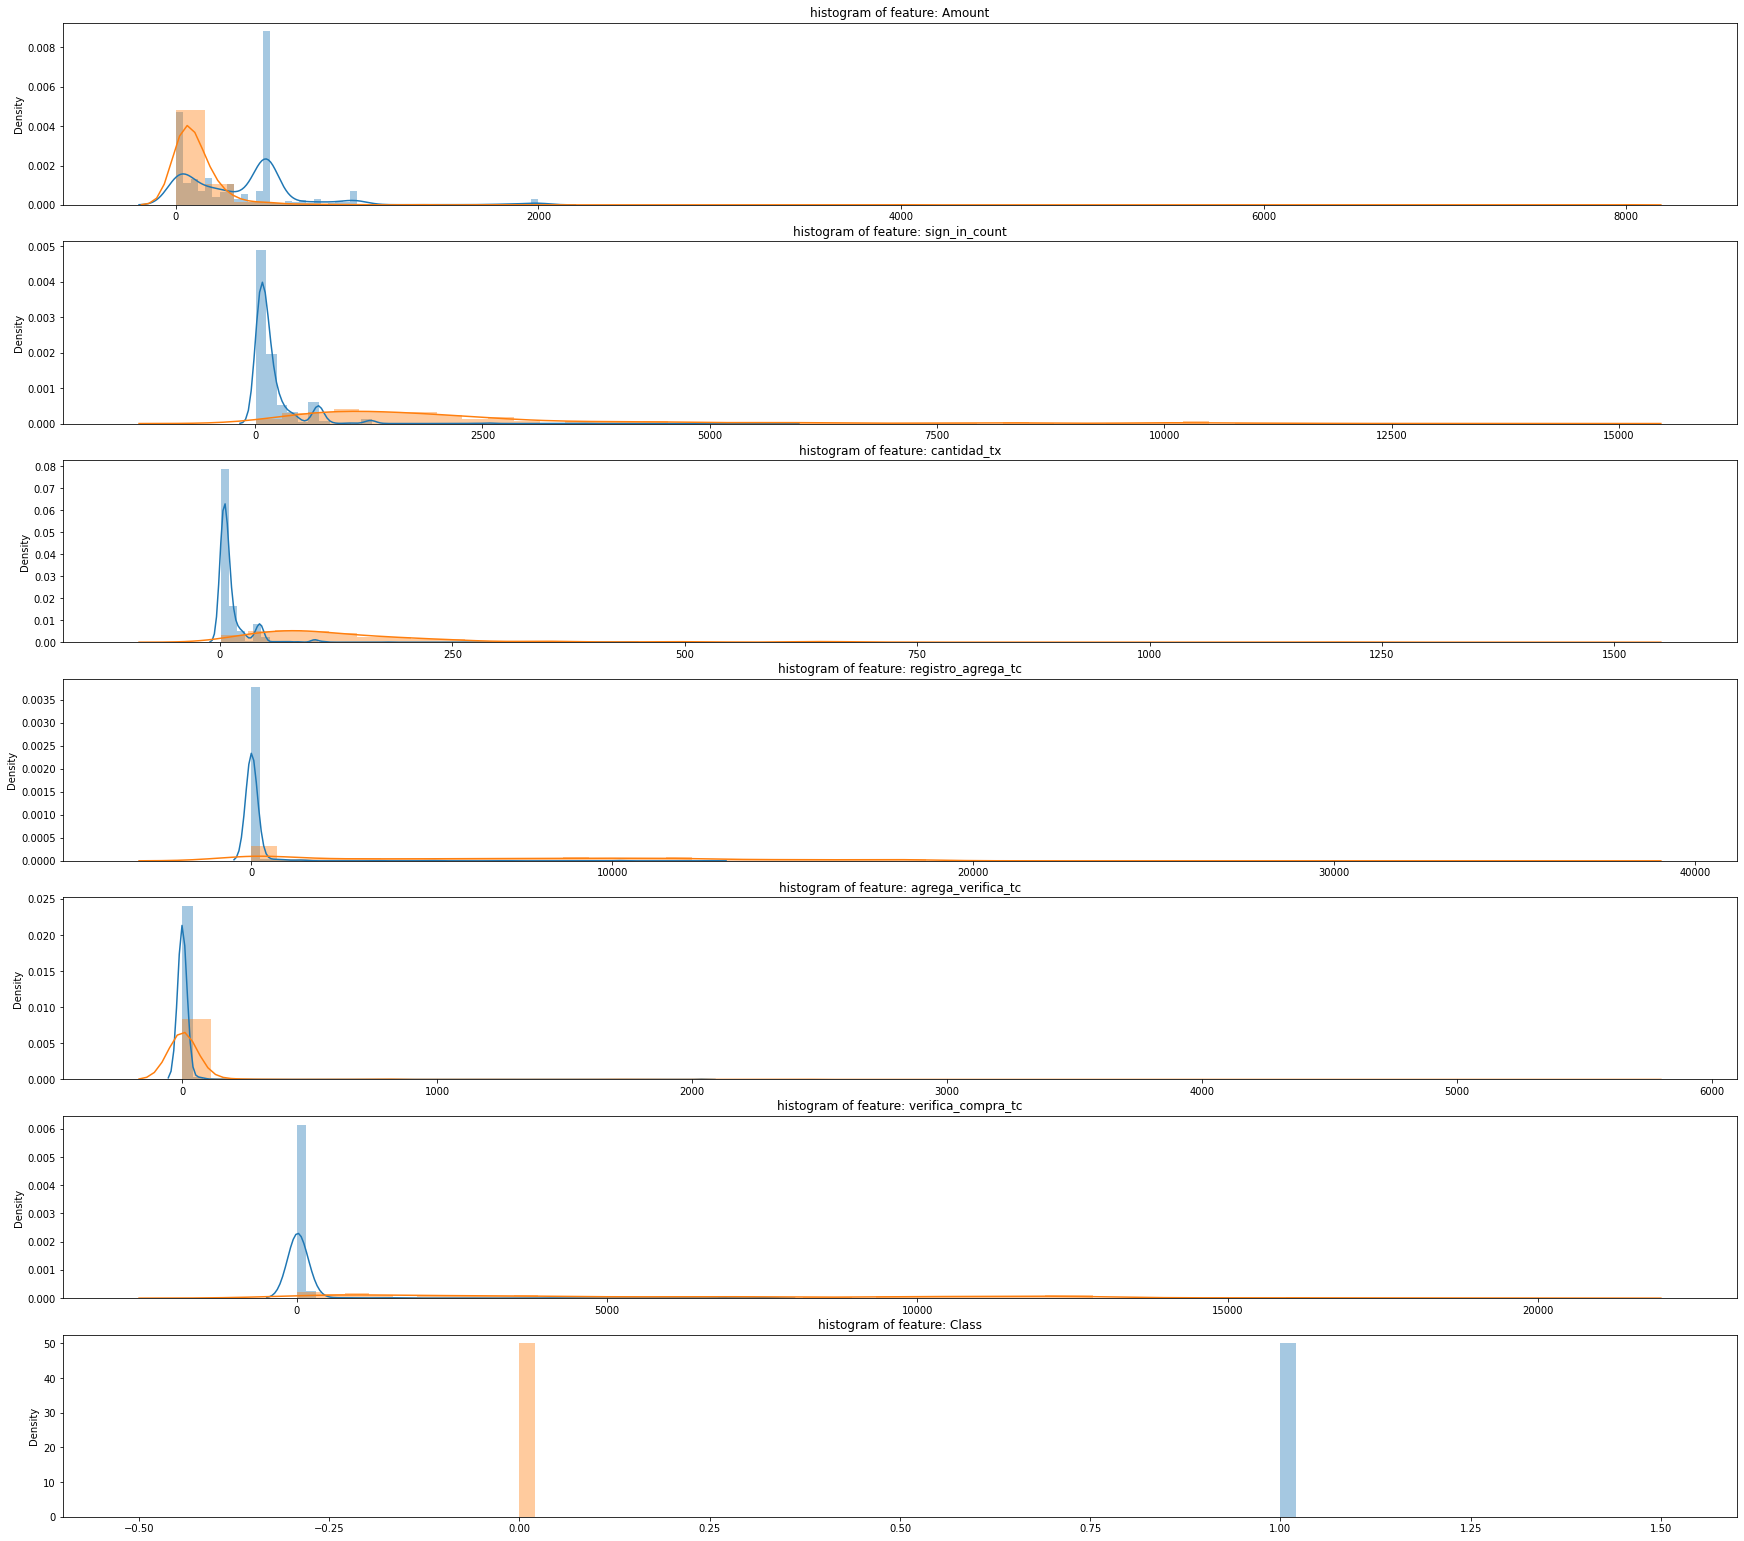

In [9]:
# distribution of anomalous features
features = data.iloc[:,0:7].columns
plt.figure(figsize=(30,30*4))
gs = gridspec.GridSpec(30, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [10]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.6070107734362438
Fraud Cases: 3775
Valid Transactions: 6219


In [11]:
print("Amount details of fraudulent transaction")
Fraud.Amount.describe()

Amount details of fraudulent transaction


count    3775.000000
mean      381.752756
std       352.925088
min         1.000000
25%        91.800000
50%       450.000000
75%       500.000000
max      2000.000000
Name: Amount, dtype: float64

In [12]:
print("details of valid transaction")
Valid.Amount.describe()

details of valid transaction


count    6219.000000
mean      135.837560
std       365.017849
min         0.800000
25%        36.300000
50%        80.000000
75%       150.000000
max      8000.000000
Name: Amount, dtype: float64

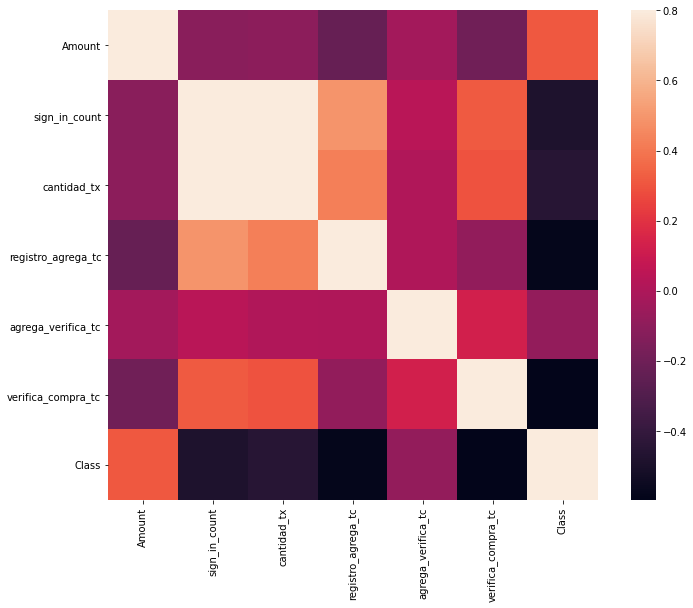

In [13]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [14]:
#dividing the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(9994, 6)
(9994,)


In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [16]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [17]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9954977488744372
The precision is 0.990578734858681
The recall is 0.997289972899729
The F1-Score is 0.9939230249831195
The Matthews correlation coefficient is0.9903616443848184


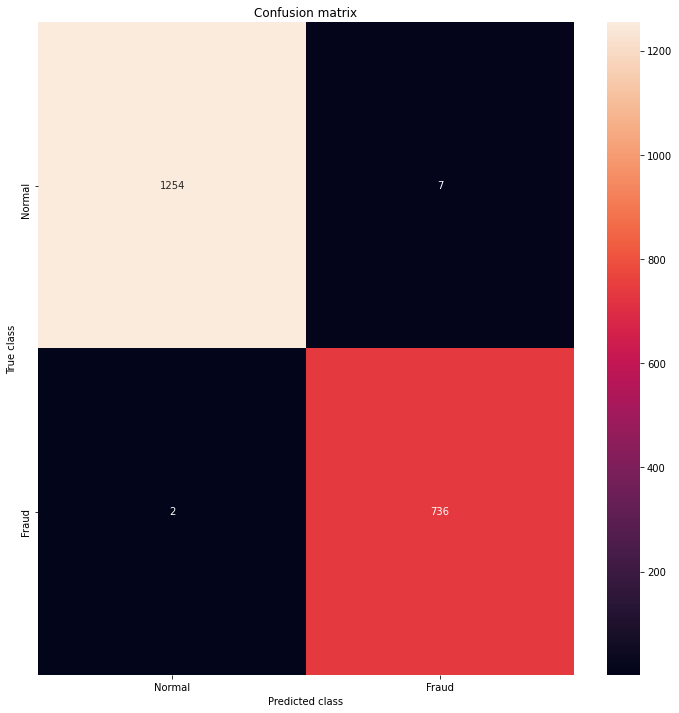

In [18]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

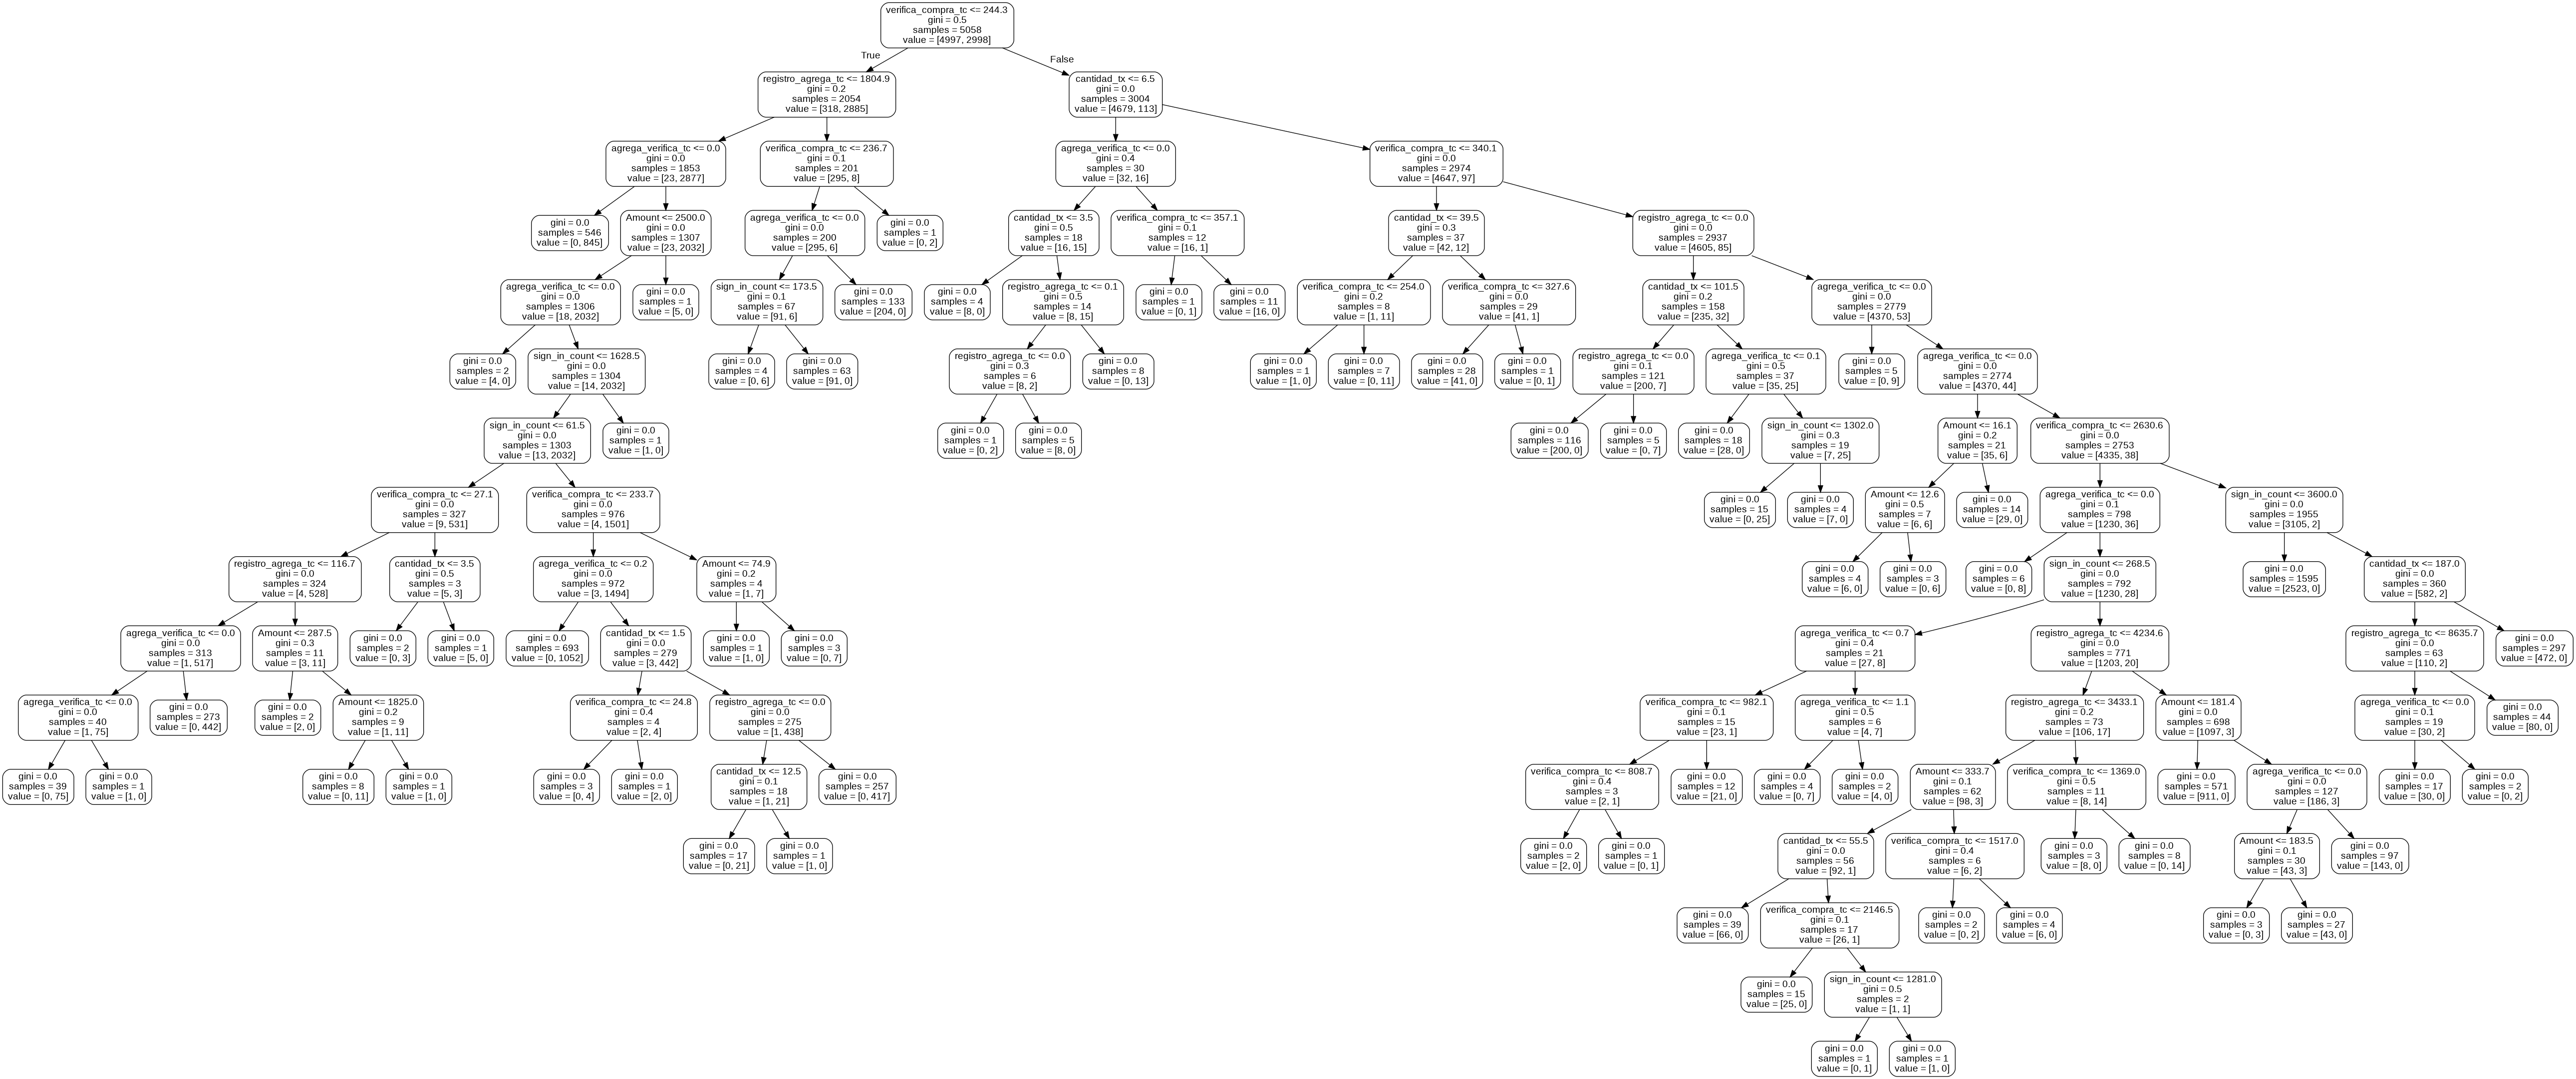

In [19]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))